## Data Science Project:
DATA: Seattle Weather Dataset Analysis

# GROUP MEMBERS: RABIA YOUNIS KHAN
#                INSHA BATOOL

# Project Overview:
In this project, we will work with the Seattle Weather dataset, which includes daily weather observations such as temperature, precipitation, and other weather-related metrics for Seattle. The goal is to preprocess the data, perform exploratory data analysis (EDA), and build and evaluate various regression models to predict a target variable. This project is divided into three main parts: Data Preprocessing, Exploratory Data Analysis (EDA), and Regression Modeling.


# Part 1: Data Preprocessing

# (A)Missing Values.

i)	Identify and list all columns in the dataset that have missing values.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("seattle-weather.csv")

In [4]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
df.isna()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [6]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.isna().sum().sum()

np.int64(0)

## Output: Above procedure shows that in the dataset there is no missing value.

ii)	Calculate the percentage of missing values for each column in the dataset.

In [18]:
total_columns = len(df)
missing_values = df.isna().sum()
missing_percentage = (missing_values / total_columns) * 100
print(missing_percentage)

date             0.0
precipitation    0.0
temp_max         0.0
temp_min         0.0
wind             0.0
weather          0.0
dtype: float64


## Output: As, we know missing value is zero. so the percentage of missing values is also zero. 

iii) For the Max Temperature column, how would you handle the missing values? Describe your approach.

In [28]:
temp = df['temp_max'].isna().sum()

In [29]:
temp

np.int64(0)

## Output: As, there is no missing values in temp_max column.so, we don't have to handle it.

iv) For the Precipitation column, how would you impute missing values? What method would you choose and why?

In [30]:
precipitation = df['precipitation'].isna().sum()

In [31]:
precipitation

np.int64(0)

## Output: As, there is no missing values in precipitation column. so,we cannot impute missing values. 

v) How would you handle missing values in the Wind Speed column for the dataset?

In [32]:
wind = df['wind'].isna().sum()

In [33]:
wind

np.int64(0)

## Output: There is no missing value in wind speed column.

vi) Identify outliers in the max and min Temperature column using a suitable method (e.g., Z-score or IQR). Describe your findings.

In [59]:
Q1 = df['temp_max'].quantile(0.25)
Q3 = df['temp_max'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
cleaned_df = df[(df['temp_max']>lower)&(df['temp_max']<upper)]
cleaned_df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [68]:
a = df.shape[0]
a

1461

In [69]:
b = cleaned_df.shape[0]
b

1461

In [70]:
outliers = a-b
outliers

0

In [61]:
Q1 = df['temp_min'].quantile(0.25)
Q3 = df['temp_min'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
cleaned_df1 = df[(df['temp_min']>lower)&(df['temp_min']<upper)]
cleaned_df1

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [71]:
a = df.shape[0]
a

1461

In [72]:
b = cleaned_df1.shape[0]
b

1461

In [73]:
outliers = a-b
outliers

0

## Output: There are no outliers 

vii) How would you handle outliers in the Precipitation column? Explain your approach

In [63]:
Q1 = df['precipitation'].quantile(0.25)
Q3 = df['precipitation'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
cleaned_df2 = df[(df['precipitation']>lower)&(df['precipitation']<upper)]
cleaned_df2

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
2,2012-01-03,0.8,11.7,7.2,2.3,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
...,...,...,...,...,...,...
1455,2015-12-26,0.0,4.4,0.0,2.5,sun
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [74]:
a = df.shape[0]
a

1461

In [75]:
b = cleaned_df2.shape[0]
b

1427

In [76]:
outliers = a-b
outliers

34

## Output: By using IQR we find outliers of precipitation. and outlier we got is 206. 

viii) Discuss the impact of outliers on the Wind Speed feature. Should you remove or transform these outliers?

In [66]:
Q1 = df['wind'].quantile(0.25)
Q3 = df['wind'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
cleaned_df3= df[(df['wind']>lower)&(df['wind']<upper)]
cleaned_df3

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [77]:
a = df.shape[0]
a

1461

In [78]:
b = cleaned_df3.shape[0]
b

1427

In [79]:
outliers = a-b
outliers

34

## Output: By using IQR we find outliers of wind. and outlier we got is 34. we remove these outliers.

ix)	Visualize the outliers in the wind column using box plots. What insights can you gain?

In [85]:
import matplotlib.pyplot as plt

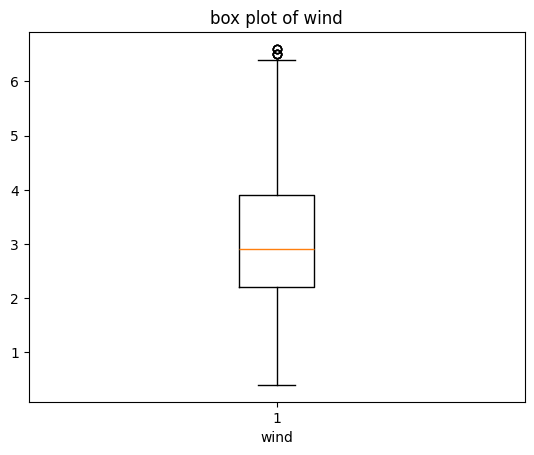

In [90]:
plt.boxplot(cleaned_df3['wind'])
plt.title('box plot of wind')
plt.xlabel('wind')
plt.show()

## Output: Above box plot of wind column.

x)	Visualize the outlers in the precipitation column using box plots. What insights can you gain?

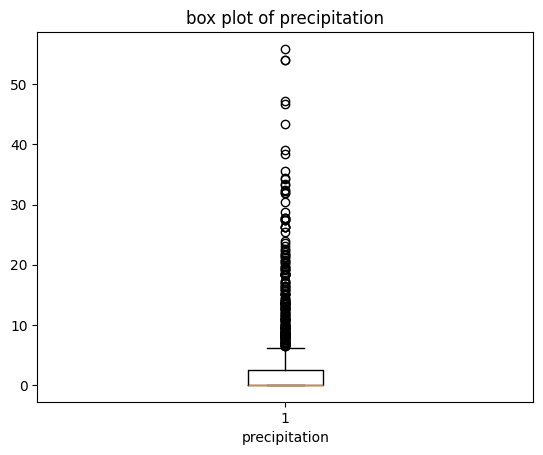

In [89]:
plt.boxplot(cleaned_df2['precipitation'])
plt.title('box plot of precipitation')
plt.xlabel('precipitation')
plt.show()

## Output: above plot shows outliers

xi)	Visualize the outlers in the temp_max column using box plots. What insights can you gain?

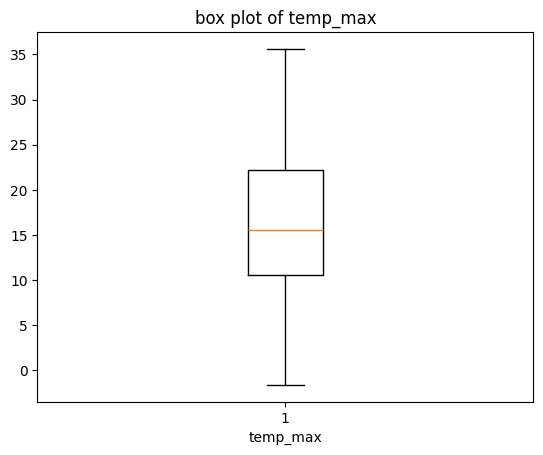

In [93]:
plt.boxplot(cleaned_df['temp_max'])
plt.title('box plot of temp_max')
plt.xlabel('temp_max')
plt.show()

## Output: Above data shows there are no outliers

In [ ]:
xii)	Visualize the outlers in the temp_min column using box plots. What insights can you gain?

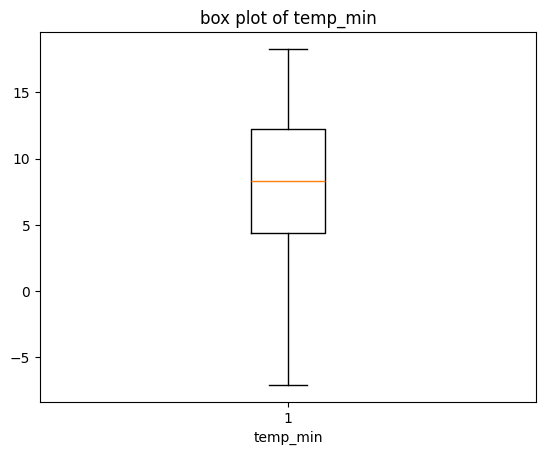

In [94]:
plt.boxplot(cleaned_df1['temp_min'])
plt.title('box plot of temp_min')
plt.xlabel('temp_min')
plt.show()

## Output: Above plot shows there are no outliers.

* Visualize the outlers in the wind,temp_max,temp_min,precipitation column using box plots. What insights can you gain?

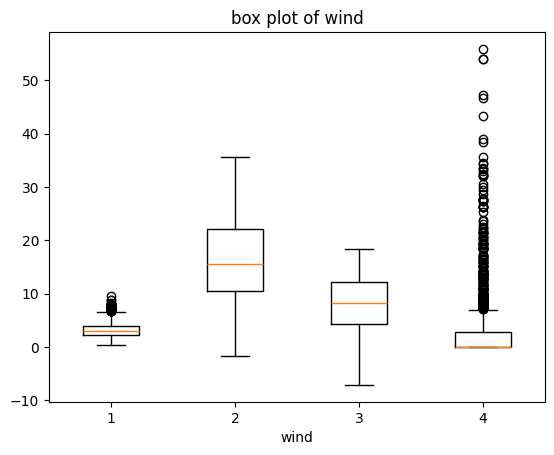

In [96]:
plt.boxplot(cleaned_df[['wind','temp_max','temp_min','precipitation']])
box_colors=dict(boxes='DarkGreen', whiskers='DarkOrange')
box_colors
plt.title("box plot of wind")
plt.xlabel("wind")
plt.show()

xiii) How does scaling affect outlier detection in the Temperature column? Apply scaling and observe the changes.

In [99]:
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df['temp_max'].values.reshape(-1,1))
df['temp_max'] = scaled_df
df['temp_max']

0      -0.495299
1      -0.794731
2      -0.645015
3      -0.576962
4      -1.026111
          ...   
1456   -1.638585
1457   -1.556922
1458   -1.257490
1459   -1.475259
1460   -1.475259
Name: temp_max, Length: 1461, dtype: float64

In [103]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df['temp_min'].values.reshape(-1,1))
df['temp_min'] = scaled_df
df['temp_min']

0      -0.644212
1      -1.082347
2      -0.206077
3      -0.524720
4      -1.082347
          ...   
1456   -1.301414
1457   -1.301414
1458   -1.520481
1459   -1.839125
1460   -2.058192
Name: temp_min, Length: 1461, dtype: float64

## Output: 